<a href="https://colab.research.google.com/github/premkumar-99/Banking-Manual-Testing-Project/blob/main/saiket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
file_path = "/content/Telco_Customer_Churn_Dataset  (3).csv"
df = pd.read_csv(file_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# ---------------------------
# Task 1: Understand the Dataset
# ---------------------------

import pandas as pd

# 1) Load the dataset (adjust path if needed)
file_path = "/content/Telco_Customer_Churn_Dataset  (3).csv"
df = pd.read_csv(file_path)

# 2) Quick shape & peek
print("Shape (rows, cols):", df.shape)
print("\n--- First 10 rows ---")
display(df.head(10))

# 3) Column data types and non-null counts
print("\n--- Info ---")
display(df.info())

# 4) Data types summary
print("\n--- Data types ---")
print(df.dtypes)

# 5) Missing values (count & percent)
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.concat([missing_count, missing_percent.rename("percent")], axis=1).sort_values("percent", ascending=False)
print("\n--- Missing values (count & % ) ---")
display(missing_df)

# 6) Quick descriptive stats (numeric and object separately)
print("\n--- Numeric summary ---")
display(df.describe().T)

print("\n--- Object / categorical summary (top values) ---")
display(df.describe(include=["object"]).T)

# 7) Target (Churn) distribution
if "Churn" in df.columns:
    print("\n--- Churn value counts & % ---")
    vc = df["Churn"].value_counts(dropna=False)
    vc_pct = df["Churn"].value_counts(normalize=True, dropna=False) * 100
    display(pd.concat([vc, vc_pct.rename("percent")], axis=1))

# 8) Check duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

# 9) Look for suspicious columns (e.g., numeric stored as object)
print("\n--- Columns possibly numeric but stored as object ---")
cand = [c for c in df.columns if df[c].dtype == "object"]
maybe_numeric = []
for c in cand:
    # try converting small sample, detect if conversion succeeds for many entries
    coerced = pd.to_numeric(df[c], errors="coerce")
    non_na_after = coerced.notna().sum()
    if non_na_after > 0:
        maybe_numeric.append((c, non_na_after, df.shape[0]))
if maybe_numeric:
    for c, good, total in maybe_numeric:
        print(f"Column `{c}` looks numeric-like for {good}/{total} rows (may need conversion)")
else:
    print("No obvious object->numeric candidates found.")

# 10) Memory usage (helpful for large datasets)
print("\n\nMemory usage:")
display(df.memory_usage(deep=True).sort_values(ascending=False))


Shape (rows, cols): (7043, 21)

--- First 10 rows ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

None


--- Data types ---
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

--- Missing values (count & % ) ---


,0,percent
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0



--- Numeric summary ---


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75



--- Object / categorical summary (top values) ---


,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095



--- Churn value counts & % ---


,count,percent
Churn,,
No,5174,73.463013
Yes,1869,26.536987



Duplicate rows: 0

--- Columns possibly numeric but stored as object ---
Column `TotalCharges` looks numeric-like for 7032/7043 rows (may need conversion)


Memory usage:


,0
PaymentMethod,475897
Contract,424701
customerID,415537
InternetService,389478
StreamingMovies,387867
StreamingTV,387842
OnlineBackup,387564
DeviceProtection,387557
TechSupport,387179
OnlineSecurity,387154


In [4]:
# -----------------------
# Task 2: Data Cleaning
# -----------------------

import pandas as pd

# Load dataset
file_path = "/content/Telco_Customer_Churn_Dataset  (3).csv"
df = pd.read_csv(file_path)

# 1. Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 2. Handle missing values created during conversion
# Drop rows where TotalCharges is NaN (very few cases, usually empty strings)
df = df.dropna(subset=["TotalCharges"])

# 3. Remove duplicate rows (if any)
df = df.drop_duplicates()

# 4. Standardize column names (lowercase + underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# -----------------------
# Check cleaning results
# -----------------------

print("✅ Data Cleaning Completed")
print("Shape of dataset:", df.shape)
print("\nData Types after cleaning:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head())


✅ Data Cleaning Completed
Shape of dataset: (7032, 21)

Data Types after cleaning:
 customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

Missing values:
 customerid       0
gender           0
seniorcitizen    0
partner          0
dependents       0
dtype: int64


📊 Summary Statistics:
        customerid gender  seniorcitizen partner dependents       tenure  \
count         7032   7032    7032.000000    7032       7032  7032.000000   
unique        7032      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3549            NaN    3639       4933          NaN   
mean           NaN    NaN       0.162400     NaN        NaN    32.421786   
std            NaN    NaN       0.368844     NaN        NaN    24.545260   
min            NaN    NaN       0.000000     NaN        NaN     1.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       phoneservice multiplelines internetservice onlinesecurity 

/tmp/ipython-input-3942223234.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="Set2")


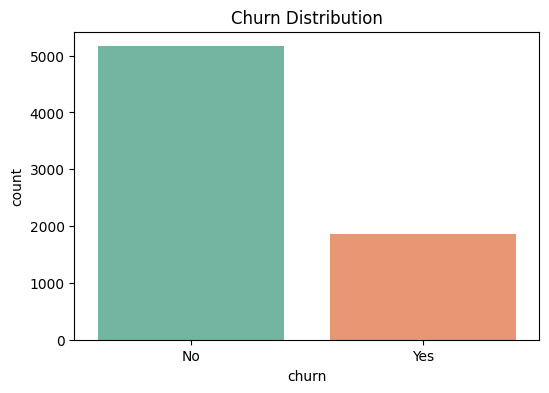

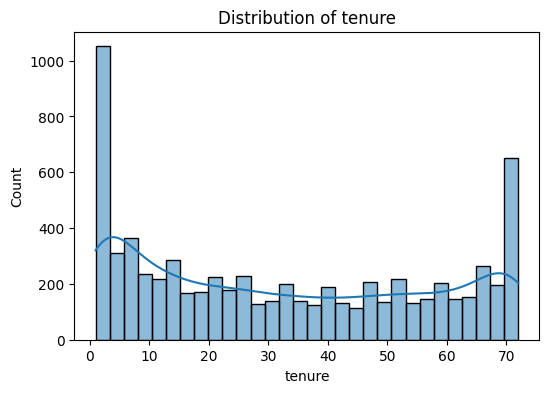

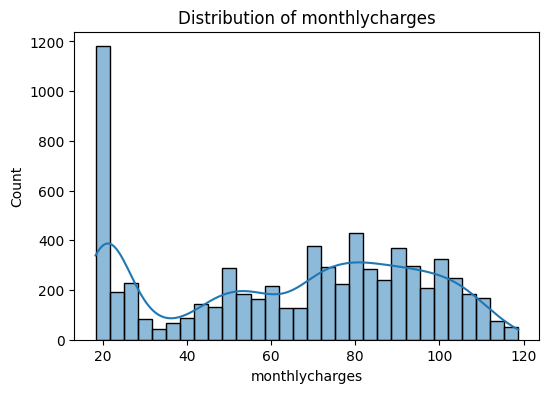

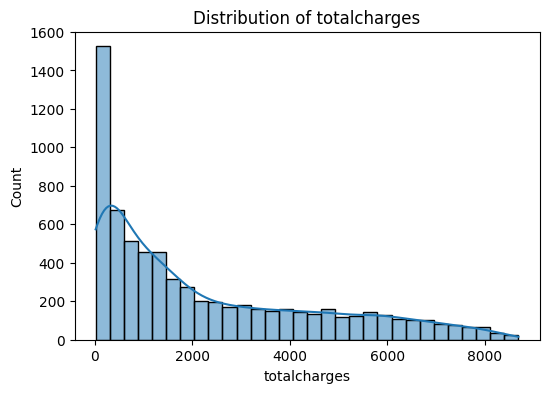

/tmp/ipython-input-3942223234.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


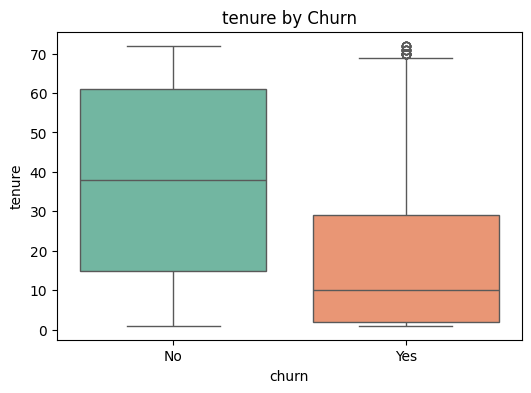

/tmp/ipython-input-3942223234.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


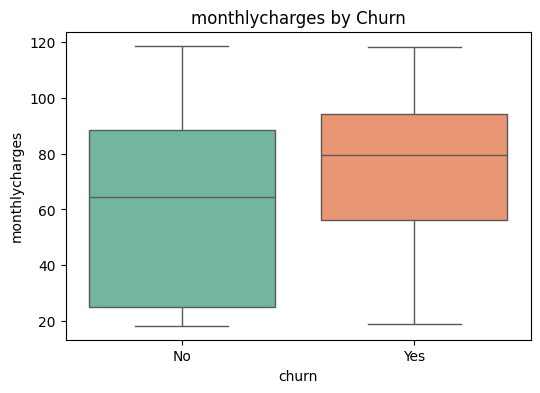

/tmp/ipython-input-3942223234.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


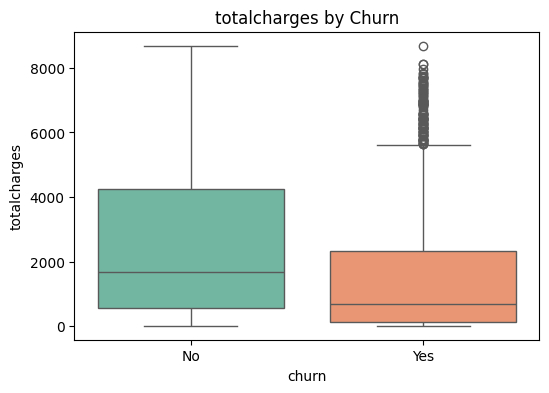


✅ Churn Rate (%):
churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


In [5]:
# -----------------------
# Task 3: Exploratory Data Analysis (EDA)
# -----------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary statistics
print("📊 Summary Statistics:")
print(df.describe(include="all"))

# 2. Churn distribution (target variable)
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

# 3. Histograms for numerical columns
num_cols = ["tenure", "monthlycharges", "totalcharges"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# 4. Boxplots for numerical columns vs churn
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="churn", y=col, data=df, palette="Set2")
    plt.title(f"{col} by Churn")
    plt.show()

# 5. Churn proportion
churn_rate = df["churn"].value_counts(normalize=True) * 100
print("\n✅ Churn Rate (%):")
print(churn_rate.round(2))


In [6]:
# -----------------------
# Task 4: Customer Segmentation Visualization
# -----------------------

import plotly.express as px

# 1. Create tenure categories
def tenure_category(tenure):
    if tenure <= 12:
        return "0-12 months"
    elif tenure <= 36:
        return "13-36 months"
    else:
        return "37+ months"

df["tenure_group"] = df["tenure"].apply(tenure_category)

# 2. Pie / Donut chart for customer distribution by tenure group
fig = px.pie(df, names="tenure_group", hole=0.4,
             title="Customer Distribution by Tenure Group")
fig.show()

# 3. Clustered bar chart for avg monthly charges across tenure groups
avg_charges = df.groupby("tenure_group")["monthlycharges"].mean().reset_index()

fig = px.bar(avg_charges,
             x="tenure_group",
             y="monthlycharges",
             text="monthlycharges",
             title="Average Monthly Charges by Tenure Group")

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


In [7]:
# -----------------------
# Task 5: Advanced Analysis
# -----------------------

# 1. Group by tenure group → stats for charges + churn
grouped_tenure = df.groupby("tenure_group").agg(
    avg_monthlycharges=("monthlycharges", "mean"),
    avg_totalcharges=("totalcharges", "mean"),
    churn_rate=("churn", lambda x: (x == "Yes").mean() * 100)
).reset_index()

print("📊 Tenure Group Stats:\n", grouped_tenure)

# Bar chart for churn rate by tenure group
import plotly.express as px
fig = px.bar(grouped_tenure,
             x="tenure_group",
             y="churn_rate",
             text="churn_rate",
             title="Churn Rate by Tenure Group")
fig.update_traces(texttemplate='%{text:.2f}%', textposition="outside")
fig.show()


# 2. Churn rate by demographics
demo_cols = ["gender", "seniorcitizen"]

for col in demo_cols:
    churn_demo = df.groupby(col)["churn"].value_counts(normalize=True).mul(100).rename("percent").reset_index()
    fig = px.bar(churn_demo[churn_demo["churn"]=="Yes"],
                 x=col, y="percent",
                 title=f"Churn Rate by {col.capitalize()}")
    fig.show()


# 3. Churn rate by Payment Method
churn_payment = df.groupby("paymentmethod")["churn"].value_counts(normalize=True).mul(100).rename("percent").reset_index()
fig = px.bar(churn_payment[churn_payment["churn"]=="Yes"],
             x="paymentmethod", y="percent",
             title="Churn Rate by Payment Method")
fig.update_xaxes(tickangle=45)
fig.show()


# 4. Churn rate by Contract Type
churn_contract = df.groupby("contract")["churn"].value_counts(normalize=True).mul(100).rename("percent").reset_index()
fig = px.bar(churn_contract[churn_contract["churn"]=="Yes"],
             x="contract", y="percent",
             title="Churn Rate by Contract Type")
fig.show()


📊 Tenure Group Stats:
    tenure_group  avg_monthlycharges  avg_totalcharges  churn_rate
0   0-12 months           56.172023        276.621563   47.678161
1  13-36 months           63.248195       1513.541756   25.538793
2    37+ months           72.008730       4213.723192   11.929357
